In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from os.path import join
from sklearn.model_selection import train_test_split 

# 현재 데이터의 총 갯수는 2890 이다. feature 는 51 개

In [2]:
df = pd.read_excel('train(1-25)_scaled_avg.xlsx')
print(df.shape)
df.head()

(2891, 51)


,홍수사상번호,date,유입량,데이터집단 1,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,...,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,avg_A_waterfall,avg_B_waterfall,avg_C_waterfall,avg_D_waterfall,avg_D_waterlevel,avg_E_waterlevel
0,1,2006-7-10 7:00:00,0.008630,0.019488,0.021277,0.019074,0.027668,0.030534,0.093930,0.153560,...,0.032389,0.030651,0.093930,0.155313,0.020875,0.019462,0.030201,0.030908,0.093930,0.155043
1,1,2006-7-10 8:00:00,0.009926,0.019184,0.021277,0.021798,0.027668,0.030534,0.093291,0.153312,...,0.040486,0.038314,0.093291,0.154916,0.020875,0.022243,0.034228,0.034771,0.093291,0.154919
2,1,2006-7-10 9:00:00,0.011529,0.019488,0.021277,0.024523,0.027668,0.030534,0.093291,0.153064,...,0.040486,0.042146,0.093291,0.154518,0.020875,0.025023,0.034899,0.036703,0.093291,0.154795
3,1,2006-7-10 10:00:00,0.013919,0.022229,0.021277,0.027248,0.027668,0.030534,0.093291,0.153064,...,0.060729,0.053640,0.093291,0.154320,0.023857,0.027804,0.046980,0.043786,0.093291,0.154719
4,1,2006-7-10 11:00:00,0.017731,0.024970,0.021277,0.032698,0.031621,0.038168,0.093291,0.153064,...,0.072874,0.061303,0.093291,0.153923,0.030318,0.033364,0.055034,0.050869,0.093291,0.154507


# date 를 index 로 사용하고자 한다. 근데 홍수 사상번호도 index 로 사용해야 되는게 아닌가? 하는 불안감이 있긴한다.  multiindex 라는 것이 있다고 한다. 나중에 필요하면 해당 키워드로 찾아 볼 것 


In [3]:
df = df.set_index('date')
df.head()

,홍수사상번호,유입량,데이터집단 1,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,데이터집단 2,...,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,avg_A_waterfall,avg_B_waterfall,avg_C_waterfall,avg_D_waterfall,avg_D_waterlevel,avg_E_waterlevel
date,,,,,,,,,,,,,,,,,,,,,
2006-7-10 7:00:00,1,0.008630,0.019488,0.021277,0.019074,0.027668,0.030534,0.093930,0.153560,0.019184,...,0.032389,0.030651,0.093930,0.155313,0.020875,0.019462,0.030201,0.030908,0.093930,0.155043
2006-7-10 8:00:00,1,0.009926,0.019184,0.021277,0.021798,0.027668,0.030534,0.093291,0.153312,0.019488,...,0.040486,0.038314,0.093291,0.154916,0.020875,0.022243,0.034228,0.034771,0.093291,0.154919
2006-7-10 9:00:00,1,0.011529,0.019488,0.021277,0.024523,0.027668,0.030534,0.093291,0.153064,0.022229,...,0.040486,0.042146,0.093291,0.154518,0.020875,0.025023,0.034899,0.036703,0.093291,0.154795
2006-7-10 10:00:00,1,0.013919,0.022229,0.021277,0.027248,0.027668,0.030534,0.093291,0.153064,0.024970,...,0.060729,0.053640,0.093291,0.154320,0.023857,0.027804,0.046980,0.043786,0.093291,0.154719
2006-7-10 11:00:00,1,0.017731,0.024970,0.021277,0.032698,0.031621,0.038168,0.093291,0.153064,0.034409,...,0.072874,0.061303,0.093291,0.153923,0.030318,0.033364,0.055034,0.050869,0.093291,0.154507


In [4]:
feature_col = ['데이터집단 1', 'Unnamed: 7','Unnamed: 8','Unnamed: 9','Unnamed: 10','Unnamed: 11','Unnamed: 12','데이터집단 2','Unnamed: 14','Unnamed: 15','Unnamed: 16','Unnamed: 17','Unnamed: 18','Unnamed: 19','데이터집단 3','Unnamed: 21','Unnamed: 22','Unnamed: 23','Unnamed: 24','Unnamed: 25','Unnamed: 26','데이터 집단 4','Unnamed: 28','Unnamed: 29','Unnamed: 30','Unnamed: 31','Unnamed: 32','Unnamed: 33','데이터 집단 5','Unnamed: 35','Unnamed: 36','Unnamed: 37','Unnamed: 38','Unnamed: 39','Unnamed: 40','데이터 집단 6','Unnamed: 42','Unnamed: 43','Unnamed: 44','Unnamed: 45','Unnamed: 46','Unnamed: 47','avg_A_waterfall', 'avg_B_waterfall', 'avg_C_waterfall', 'avg_D_waterfall', 'avg_D_waterlevel', 'avg_E_waterlevel']
label_col = ['유입량']

In [5]:
def make_dataset(data, label, window_size=20):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)

In [6]:
# 325 는 홍수 번호 23, 24, 25 를 의미. 일단은 여기에 있는 값을 예측하도록 만들어 보자.
# 홍수 번호 22 까지 train set 으로 설정하고, 23,24,25 는 test set 으로 설정!
TEST_SIZE = 325
train = df[:-TEST_SIZE]
test = df[-TEST_SIZE:]

train_feature = train[feature_col]
train_label = train[label_col]

# train_feature 는 일단 홍수 번호 22 까지만 포함하였다. 

In [7]:
print(len(train_feature),len(train_label))

2566 2566


In [8]:
train_feature

,데이터집단 1,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,데이터집단 2,Unnamed: 14,Unnamed: 15,...,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,avg_A_waterfall,avg_B_waterfall,avg_C_waterfall,avg_D_waterfall,avg_D_waterlevel,avg_E_waterlevel
date,,,,,,,,,,,,,,,,,,,,,
2006-7-10 7:00:00,0.019488,0.021277,0.019074,0.027668,0.030534,0.093930,0.153560,0.019184,0.020772,0.019074,...,0.032389,0.030651,0.093930,0.155313,0.020875,0.019462,0.030201,0.030908,0.093930,0.155043
2006-7-10 8:00:00,0.019184,0.021277,0.021798,0.027668,0.030534,0.093291,0.153312,0.019488,0.020772,0.021798,...,0.040486,0.038314,0.093291,0.154916,0.020875,0.022243,0.034228,0.034771,0.093291,0.154919
2006-7-10 9:00:00,0.019488,0.021277,0.024523,0.027668,0.030534,0.093291,0.153064,0.022229,0.020772,0.024523,...,0.040486,0.042146,0.093291,0.154518,0.020875,0.025023,0.034899,0.036703,0.093291,0.154795
2006-7-10 10:00:00,0.022229,0.021277,0.027248,0.027668,0.030534,0.093291,0.153064,0.024970,0.020772,0.027248,...,0.060729,0.053640,0.093291,0.154320,0.023857,0.027804,0.046980,0.043786,0.093291,0.154719
2006-7-10 11:00:00,0.024970,0.021277,0.032698,0.031621,0.038168,0.093291,0.153064,0.034409,0.026706,0.032698,...,0.072874,0.061303,0.093291,0.153923,0.030318,0.033364,0.055034,0.050869,0.093291,0.154507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-7-19 5:00:00,0.097267,0.136778,0.114441,0.035573,0.026718,0.174441,0.654924,0.097140,0.133531,0.114441,...,0.036437,0.019157,0.174441,0.655412,0.134195,0.116775,0.048322,0.021893,0.174441,0.655578
2013-7-19 6:00:00,0.097140,0.136778,0.114441,0.035573,0.019084,0.173163,0.654924,0.097140,0.133531,0.114441,...,0.028340,0.019157,0.173163,0.655412,0.134195,0.113994,0.046980,0.019317,0.173163,0.655628
2013-7-19 7:00:00,0.097140,0.136778,0.114441,0.035573,0.019084,0.172524,0.654924,0.097140,0.133531,0.114441,...,0.008097,0.019157,0.172524,0.655412,0.134195,0.113068,0.043624,0.019317,0.172524,0.655678


In [9]:
train_label

,유입량
date,
2006-7-10 7:00:00,0.008630
2006-7-10 8:00:00,0.009926
2006-7-10 9:00:00,0.011529
2006-7-10 10:00:00,0.013919
2006-7-10 11:00:00,0.017731
...,...
2013-7-19 5:00:00,0.032520
2013-7-19 6:00:00,0.031548
2013-7-19 7:00:00,0.030498


# 여기 윗까지 일단 train_label 이랑, train_feature 를 나누는 것에 성공을 하였다. 

In [10]:
# train dataset
train_feature, train_label = make_dataset(train_feature, train_label, 20)

In [11]:
print(len(train_feature), len(train_label))

2546 2546


In [12]:
train_label

array([[0.06010701],
       [0.05826407],
       [0.05869976],
       ...,
       [0.03049788],
       [0.0295746 ],
       [0.02901311]])

In [13]:
train_feature

array([[[0.01948843, 0.0212766 , 0.01907357, ..., 0.03090792,
         0.09392971, 0.15504297],
        [0.01918392, 0.0212766 , 0.02179837, ..., 0.03477141,
         0.09329073, 0.15491893],
        [0.01948843, 0.0212766 , 0.02452316, ..., 0.03670316,
         0.09329073, 0.15479488],
        ...,
        [0.17356882, 0.12462006, 0.16621253, ..., 0.23245332,
         0.18913738, 0.15296667],
        [0.1772229 , 0.12462006, 0.16893733, ..., 0.23438506,
         0.19744409, 0.15393783],
        [0.18087698, 0.13069909, 0.17166213, ..., 0.23889247,
         0.20127796, 0.15519928]],

       [[0.01918392, 0.0212766 , 0.02179837, ..., 0.03477141,
         0.09329073, 0.15491893],
        [0.01948843, 0.0212766 , 0.02452316, ..., 0.03670316,
         0.09329073, 0.15479488],
        [0.02222899, 0.0212766 , 0.02724796, ..., 0.04378622,
         0.09329073, 0.15471886],
        ...,
        [0.1772229 , 0.12462006, 0.16893733, ..., 0.23438506,
         0.19744409, 0.15393783],
        [0.1

In [14]:
x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size=633)
print("x_train.shape", "x_valid.shape")
print(x_train.shape, x_valid.shape)
print("y_train, y_valid")
print(y_train.shape, y_valid.shape)


test_feature = test[feature_col]
test_label = test[label_col]



# test dataset (실제 예측 해볼 데이터)
test_feature, test_label = make_dataset(test_feature, test_label, 20)
print("test_feature.shape, test_label.shape")
print(test_feature.shape, test_label.shape)

x_train.shape x_valid.shape
(1913, 20, 48) (633, 20, 48)
y_train, y_valid
(1913, 1) (633, 1)
test_feature.shape, test_label.shape
(305, 20, 48) (305, 1)


# 아 train_featureshape[1] 이라는게 time step 을 의미하는 것인가? 


In [15]:
print(train_feature.shape[0])
print(train_feature.shape[1])

2546
20


In [16]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LSTM
import tensorflow as tf


model = Sequential()
model.add(LSTM(100,input_shape=(train_feature.shape[1], train_feature.shape[2]),activation='relu',return_sequences=False))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer='adam')

# early_stop = EarlyStopping(monitor='val_loss', patience=5)
# filename = os.path.join('tmp_checkpoint.h5')
# checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

print(model.summary())
history = model.fit(x_train, y_train, 
                    epochs=200, 
                    batch_size=16,
                    verbose = 2,
                    validation_data=(x_valid, y_valid))

2021-08-21 01:17:23.647175: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100)               59600     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 59,701
Trainable params: 59,701
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/200


2021-08-21 01:17:23.883865: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)


120/120 - 17s - loss: 0.0032 - val_loss: 0.0018
Epoch 2/200
120/120 - 1s - loss: 0.0013 - val_loss: 0.0014
Epoch 3/200
120/120 - 1s - loss: 8.2110e-04 - val_loss: 9.2830e-04
Epoch 4/200
120/120 - 1s - loss: 6.7282e-04 - val_loss: 7.5712e-04
Epoch 5/200
120/120 - 1s - loss: 6.3113e-04 - val_loss: 5.4171e-04
Epoch 6/200
120/120 - 1s - loss: 5.2265e-04 - val_loss: 0.0012
Epoch 7/200
120/120 - 1s - loss: 6.3419e-04 - val_loss: 5.6902e-04
Epoch 8/200
120/120 - 1s - loss: 6.3111e-04 - val_loss: 0.0017
Epoch 9/200
120/120 - 1s - loss: 5.3751e-04 - val_loss: 8.2720e-04
Epoch 10/200
120/120 - 1s - loss: 4.1937e-04 - val_loss: 4.9263e-04
Epoch 11/200
120/120 - 1s - loss: 3.9070e-04 - val_loss: 5.0661e-04
Epoch 12/200
120/120 - 1s - loss: 4.0742e-04 - val_loss: 4.3583e-04
Epoch 13/200
120/120 - 1s - loss: 5.0479e-04 - val_loss: 4.0866e-04
Epoch 14/200
120/120 - 1s - loss: 3.5683e-04 - val_loss: 4.4603e-04
Epoch 15/200
120/120 - 1s - loss: 4.4978e-04 - val_loss: 3.5031e-04
Epoch 16/200
120/120 - 1

Epoch 122/200
120/120 - 1s - loss: 6.1774e-05 - val_loss: 1.1559e-04
Epoch 123/200
120/120 - 1s - loss: 6.9431e-05 - val_loss: 1.0950e-04
Epoch 124/200
120/120 - 1s - loss: 8.0021e-05 - val_loss: 9.9246e-05
Epoch 125/200
120/120 - 1s - loss: 7.0557e-05 - val_loss: 1.6983e-04
Epoch 126/200
120/120 - 1s - loss: 9.0321e-05 - val_loss: 1.0287e-04
Epoch 127/200
120/120 - 1s - loss: 6.7999e-05 - val_loss: 9.3854e-05
Epoch 128/200
120/120 - 1s - loss: 6.4318e-05 - val_loss: 1.1051e-04
Epoch 129/200
120/120 - 1s - loss: 6.4731e-05 - val_loss: 8.4686e-05
Epoch 130/200
120/120 - 1s - loss: 6.8755e-05 - val_loss: 1.2604e-04
Epoch 131/200
120/120 - 1s - loss: 6.6102e-05 - val_loss: 1.2546e-04
Epoch 132/200
120/120 - 1s - loss: 7.3796e-05 - val_loss: 9.6045e-05
Epoch 133/200
120/120 - 1s - loss: 8.0095e-05 - val_loss: 9.0739e-05
Epoch 134/200
120/120 - 1s - loss: 7.3575e-05 - val_loss: 1.1468e-04
Epoch 135/200
120/120 - 1s - loss: 6.1368e-05 - val_loss: 8.6871e-05
Epoch 136/200
120/120 - 1s - loss:

In [17]:
# import os
# from os.path import join
# from tensorflow.keras.optimizers import RMSprop
# opt = RMSprop(lr=0.001)

# model.compile(loss='mean_squared_error', optimizer = 'adam')
# early_stop = EarlyStopping(monitor='val_loss', patience=5)
# # filename = os.path.join(model_path, 'tmp_checkpoint.h5')
# # checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

# history = model.fit(x_train, y_train, 
#                     epochs=200, 
#                     batch_size=16,
#                     verbose = 2,
#                     validation_data=(x_valid, y_valid))
# #                     callbacks=[early_stop, checkpoint])                   

In [18]:
# model.load_weights(filename)
pred = model.predict(test_feature)

In [19]:
from sklearn.metrics import mean_squared_error
RMSE = mean_squared_error(test_label,pred)**0.5
RMSE

0.02717907697511613

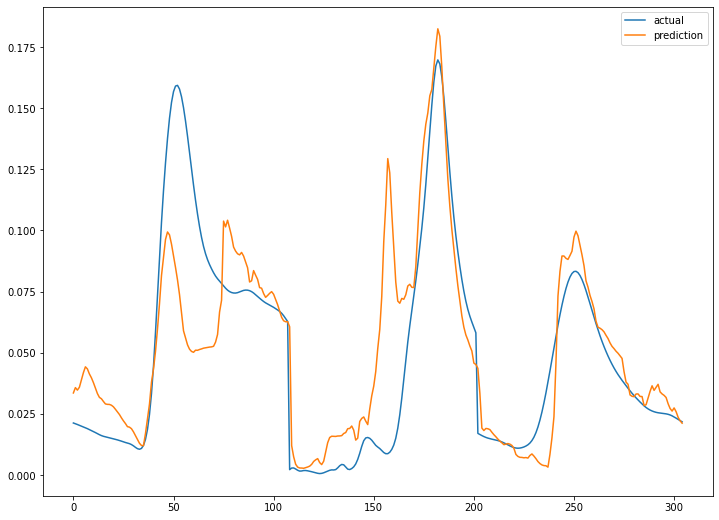

In [20]:
plt.figure(figsize=(12, 9))
plt.plot(test_label, label='actual')
plt.plot(pred, label='prediction')
plt.legend()
plt.show()